In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv("C:/Users/abhis/OneDrive/Desktop/Intern_Dataset/Global Superstore.txt", delimiter="\t")

In [6]:
df.to_csv("Global_Superstore.csv", index=False)

In [4]:
df.head

<bound method NDFrame.head of               Category         City        Country Customer ID  \
0      Office Supplies  Los Angeles  United States   LS-172304   
1      Office Supplies  Los Angeles  United States   MV-174854   
2      Office Supplies  Los Angeles  United States   CS-121304   
3      Office Supplies  Los Angeles  United States   CS-121304   
4      Office Supplies  Los Angeles  United States   AP-109154   
...                ...          ...            ...         ...   
51285  Office Supplies  Los Angeles  United States   AM-103604   
51286  Office Supplies  Los Angeles  United States   AM-103604   
51287  Office Supplies  Los Angeles  United States   HR-147704   
51288  Office Supplies  Los Angeles  United States   RM-196754   
51289  Office Supplies  Los Angeles  United States   FH-143654   

          Customer Name  Discount Market  记录数               Order Date  \
0      Lycoris Saunders       0.0     US    1  2011-01-07 00:00:00.000   
1         Mark Van Huff      

In [6]:
df.isnull().sum()
#There are no missing values 

Category          0
City              0
Country           0
Customer ID       0
Customer Name     0
Discount          0
Market            0
记录数               0
Order Date        0
Order ID          0
Order Priority    0
Product ID        0
Product Name      0
Profit            0
Quantity          0
Region            0
Row ID            0
Sales             0
Segment           0
Ship Date         0
Ship Mode         0
Shipping Cost     0
State             0
Sub-Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [8]:
duplicates = df.duplicated()
print(duplicates.sum())
#There are no duplicate values

0


In [31]:
#Detecting and handling outliers using statistical techniques (IQR - Interquartile Range)
num_cols = ["Sales", "Profit", "Quantity", "Shipping Cost"]
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

df_cleaned = df.copy()
for col in num_cols:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

In [11]:
df_cleaned.to_csv("cleaned_data.csv", index=False)

In [12]:
df_cleaned.head

<bound method NDFrame.head of               Category         City        Country Customer ID  \
0      Office Supplies  Los Angeles  United States   LS-172304   
1      Office Supplies  Los Angeles  United States   MV-174854   
2      Office Supplies  Los Angeles  United States   CS-121304   
3      Office Supplies  Los Angeles  United States   CS-121304   
4      Office Supplies  Los Angeles  United States   AP-109154   
...                ...          ...            ...         ...   
51285  Office Supplies  Los Angeles  United States   AM-103604   
51286  Office Supplies  Los Angeles  United States   AM-103604   
51287  Office Supplies  Los Angeles  United States   HR-147704   
51288  Office Supplies  Los Angeles  United States   RM-196754   
51289  Office Supplies  Los Angeles  United States   FH-143654   

          Customer Name  Discount Market  记录数               Order Date  \
0      Lycoris Saunders       0.0     US    1  2011-01-07 00:00:00.000   
1         Mark Van Huff      

In [37]:
stats_summary = df_cleaned[num_cols].describe().T

In [38]:
stats_summary["variance"] = df_cleaned[num_cols].var()
stats_summary["median"] = df_cleaned[num_cols].median()

In [39]:
print("Descriptive Statistics : \n",stats_summary)

Descriptive Statistics : 
                  count       mean        std     min      25%      50%  \
Sales          32979.0  66.671640  68.741691   0.000  20.0000  44.0000   
Profit         32979.0   9.130693  17.987750 -40.020   0.5595   6.2415   
Quantity       32979.0   2.794718   1.601331   1.000   2.0000   2.0000   
Shipping Cost  32979.0   5.968075   5.712225   0.002   1.6460   3.9000   

                   75%     max     variance   median  
Sales          90.0000  572.00  4725.420134  44.0000  
Profit         17.1190   66.66   323.559142   6.2415  
Quantity        4.0000    7.00     2.564262   2.0000  
Shipping Cost   8.5415   24.77    32.629512   3.9000  


In [40]:
correlation_matrix = df_cleaned[num_cols].corr()
print("Correlation Matrix : \n",correlation_matrix)

Correlation Matrix : 
                   Sales    Profit  Quantity  Shipping Cost
Sales          1.000000  0.445984  0.227171       0.730604
Profit         0.445984  1.000000  0.140699       0.395468
Quantity       0.227171  0.140699  1.000000       0.211139
Shipping Cost  0.730604  0.395468  0.211139       1.000000


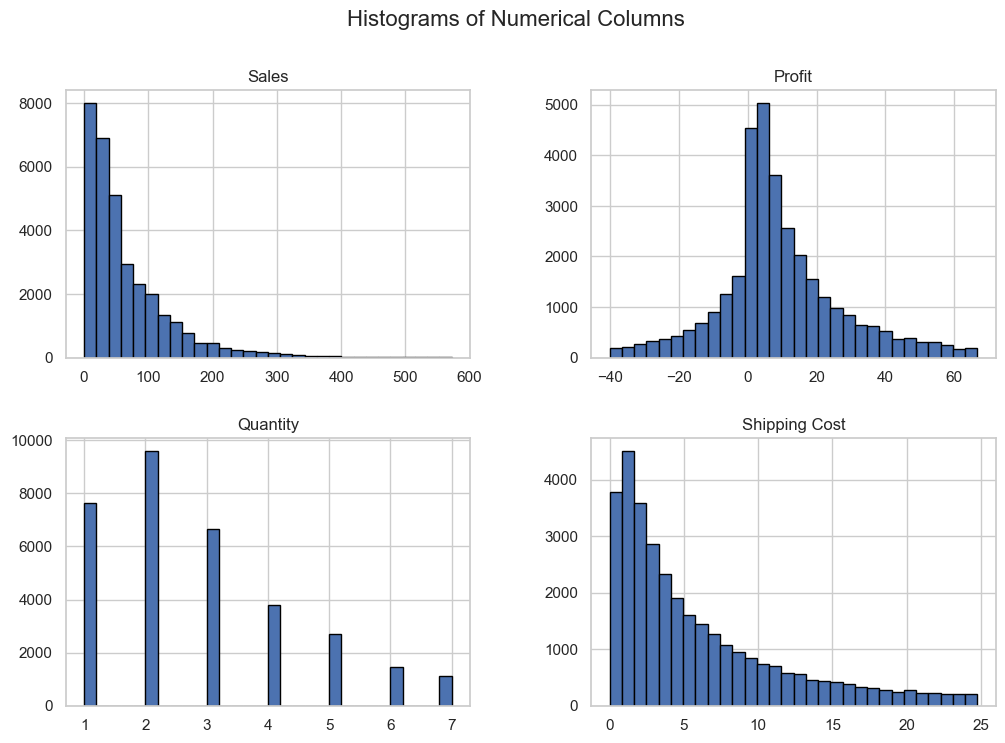

In [52]:
#Histogram to see distribution of numerical data
df_cleaned[num_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.show()
# Histograms show us the distribution of the various columns as specified in num_cols

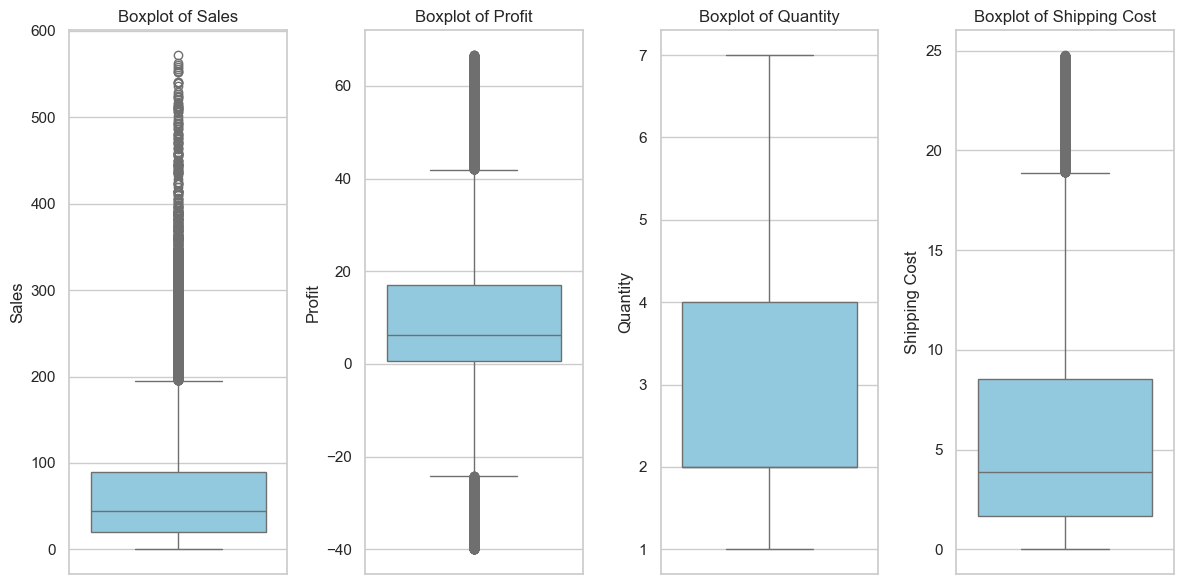

In [43]:
#Boxplot for outlier detection
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df_cleaned[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()
# For Sales : Right-skewed distribution: The long upper whisker and many high-value outliers suggest that most sales are small, but a few large 
# transactions drive the overall sales figures.
# For Profit : A right-skewed distribution is present, with more extreme high-value outliers than low-value ones.
# For Quantity : There are no extreme outliers, meaning quantity values are relatively consistent.
# For Shipping Cost : The presence of a long whisker on the upper end suggests that a few transactions have exceptionally high shipping costs.

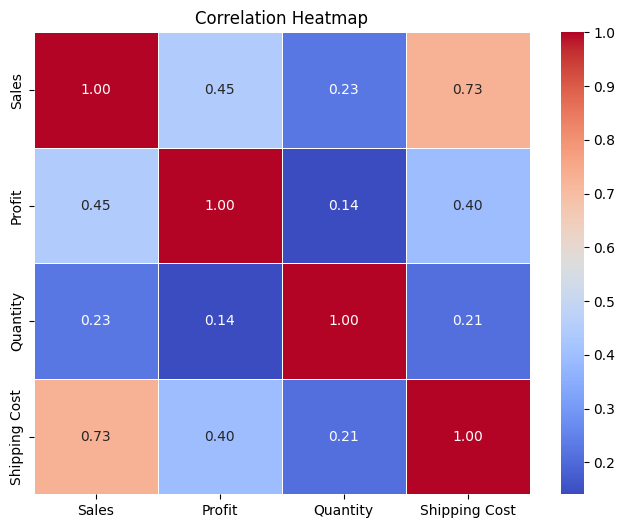

In [41]:
#Heatmap for correlations
plt.figure(figsize=(8, 6))
corr_matrix = df_cleaned[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
# The strongest relationships exist between the financial aspects of the data (Sales, Profit, Shipping Cost), 
# while Quantity appears to be a less influential factor in these relationships.

In [7]:
selected_cols = ["Product Name","Region","Sales","Profit","Discount","Category","Order Date"]
df_filtered = df[selected_cols]

In [25]:
df_filtered.head

<bound method NDFrame.head of                                             Product Name Region  Sales  \
0                                              Xerox 225   West     19   
1              Wirebound Service Call Books, 5 1/2" x 4"   West     19   
2      Adams Phone Message Book, Professional, 400 Me...   West     21   
3                                             Xerox 1913   West    111   
4                                              Xerox 223   West      6   
...                                                  ...    ...    ...   
51285                   Satellite Sectional Post Binders   West     69   
51286                                            Staples   West      9   
51287                          GBC Plastic Binding Combs   West     12   
51288                       Vinyl Sectional Post Binders   West     90   
51289          GBC DocuBind P50 Personal Binding Machine   West    154   

        Profit  Discount         Category               Order Date  
0       9.33

In [27]:
df_filtered.shape

(51290, 7)

In [28]:
df_filtered.dtypes

Product Name     object
Region           object
Sales             int64
Profit          float64
Discount        float64
Category         object
Order Date       object
dtype: object

In [29]:
duplicate = df_filtered.duplicated()
print(duplicate.sum())

16


In [33]:
#As seen above there are 16 duplicate values
df_filtered = df_cleaned.drop_duplicates()

In [34]:
duplicate = df_filtered.duplicated()
print(duplicate.sum())
#Duplicate values have been removed

0


In [35]:
df_filtered.isnull().sum()
#There are no empty values

Category          0
City              0
Country           0
Customer ID       0
Customer Name     0
Discount          0
Market            0
记录数               0
Order Date        0
Order ID          0
Order Priority    0
Product ID        0
Product Name      0
Profit            0
Quantity          0
Region            0
Row ID            0
Sales             0
Segment           0
Ship Date         0
Ship Mode         0
Shipping Cost     0
State             0
Sub-Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [40]:
#Convert date column to a datetime object for trend analysis
df_filtered["Order Date"] = pd.to_datetime(df_filtered["Order Date"])

In [39]:
df_filtered["Order Date"].head

<bound method NDFrame.head of 0       2011-01-07
1       2011-01-21
2       2011-08-05
3       2011-08-05
4       2011-09-29
           ...    
51285   2014-12-03
51286   2014-12-03
51287   2014-12-18
51288   2014-12-25
51289   2014-12-26
Name: Order Date, Length: 32979, dtype: datetime64[ns]>

In [50]:
#Plot time series graphs to observe trends in Sales over time.

#Sorted by date
df_filtered = df_filtered.sort_values("Order Date")
#Aggregate sales by date
df_filtered_time = df_filtered.groupby("Order Date")["Sales"].sum()

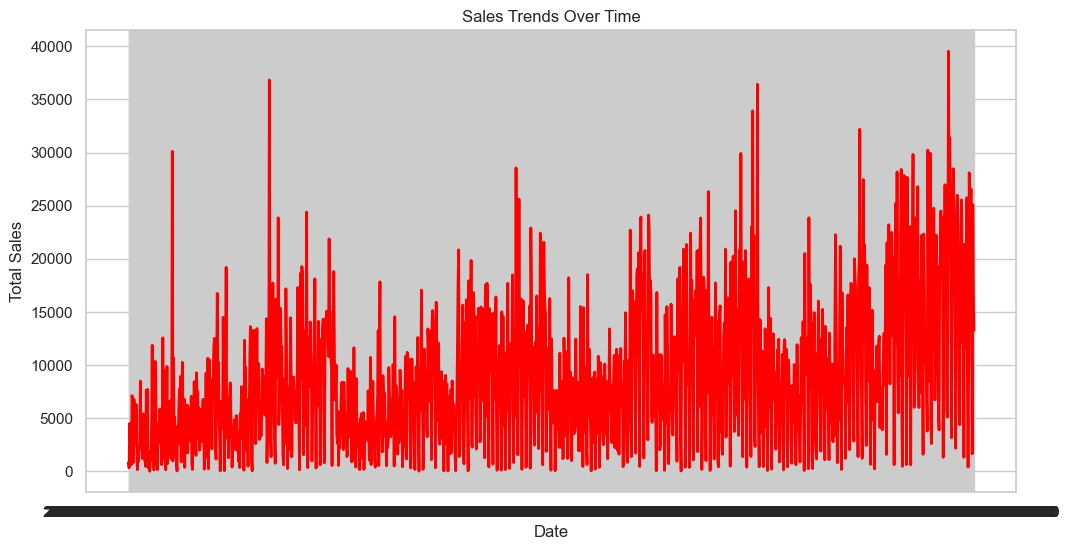

In [51]:
#Plotting time series graph

plt.figure(figsize=(12, 6))
plt.plot(df_filtered_time, color="red", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Trends Over Time")
plt.grid(True)
plt.show()

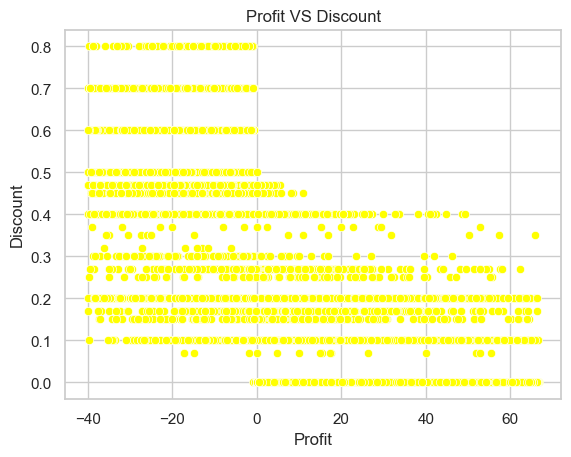

In [49]:
#Use scatter plots to study the relationship between Profit and Discount.

sns.scatterplot(x=df_filtered['Profit'], y=df_filtered['Discount'], color='yellow')
plt.title('Profit VS Discount')
plt.xlabel('Profit')
plt.ylabel('Discount')
plt.show()
# The concentration of data points at zero or negative profit, especially at higher discount levels, 
# suggests a potential need to re-evaluate discounting strategies to ensure profitability.

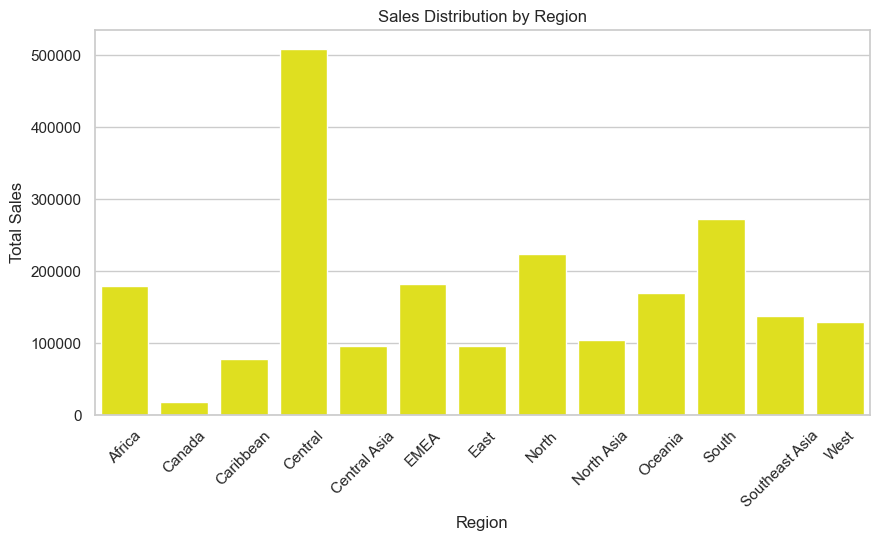

In [48]:
#Bar plot of sales distribution by region

plt.figure(figsize=(10, 5))
sns.barplot(x=df_filtered.groupby("Region")["Sales"].sum().index, y=df_filtered.groupby("Region")["Sales"].sum().values, color="Yellow")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Sales Distribution by Region")
plt.xticks(rotation=45)
plt.show()
# The chart highlights significant variations in sales performance across regions. 
# The dominant Central region suggests potential opportunities for growth in other areas.

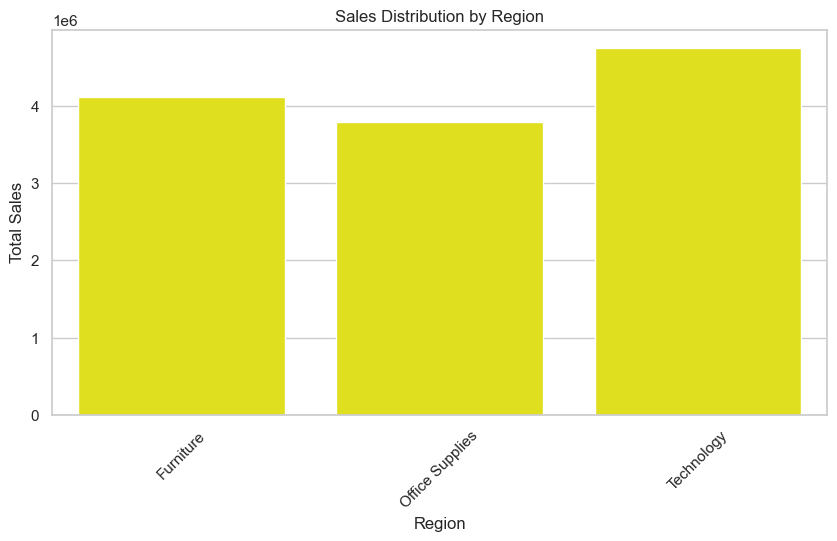

In [49]:
#Bar plot of sales distribution by category

plt.figure(figsize=(10, 5))
sns.barplot(x=df_filtered.groupby("Category")["Sales"].sum().index, y=df_filtered.groupby("Category")["Sales"].sum().values, color="Yellow")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Sales Distribution by Region")
plt.xticks(rotation=45)
plt.show()

# While the chart highlights the strong performance of Office Supplies compared to Furniture and Technology, 
# the lack of clear region labels prevents a thorough regional analysis.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
a = df_filtered[['Profit' , 'Discount']]
b = df_filtered['Sales']

In [20]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2)

In [21]:
print(f"x_train : {a_train.shape}")
print(f"x_test : {a_test.shape}")
print(f"y_train : {b_train.shape}")
print(f"y_test : {b_test.shape}")

x_train : (41032, 2)
x_test : (10258, 2)
y_train : (41032,)
y_test : (10258,)


In [26]:
model = LinearRegression()
model.fit(a_train,b_train)

LinearRegression()

In [27]:
b_pred = model.predict(a_test)

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [29]:
print(f"MSE : {mean_squared_error(b_test,b_pred)}")
print(f"MAE : {mean_absolute_error(b_test,b_pred)}")
print(f"r2 score : {r2_score(b_test,b_pred)}")

MSE : 185255.18200067407
MAE : 224.1104512394371
r2 score : 0.24656961956548962


In [ ]:
#The relatively high MSE and MAE, combined with the low R², suggest that linear regression model is not a good fit for given data.